<a href="https://colab.research.google.com/github/taba4ek555/dz/blob/main/Parser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests beautifulsoup4
!pip install nltk matplotlib

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random

In [3]:
!pip install fake_useragent

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.1/201.1 kB 4.7 MB/s eta 0:00:00


In [4]:
def fetch_habr_articles(max_articles=1000):
    articles = []  # Список для хранения статей
    page_number = 1

    while len(articles) < max_articles:
        url = f'https://habr.com/ru/all/page{page_number}/'
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        }

        response = requests.get(url, headers=headers)

        if response.status_code != 200:
            print(f"Ошибка доступа к странице {page_number}: {response.status_code}")
            break  # Выход из цикла при ошибке доступа

        soup = BeautifulSoup(response.text, 'html.parser')

        # Находим все статьи на странице
        articles_on_page = soup.find_all('article')

        if not articles_on_page:
            print(f"На странице {page_number} не найдено статей.")
            break  # Если на странице нет статей, выходим из цикла

        for article in articles_on_page:
            title_tag = article.find('h2')  # Заголовок статьи
            title = title_tag.get_text(strip=True) if title_tag else ' '

            text_tag = article.find('div', class_='article-formatted-body')  # Текст статьи
            text = text_tag.get_text(strip=True) if text_tag else ' '

            # Количество комментов
            comments_tag = article.find('span', class_="tm-article-comments-counter-link__value")
            comments = comments_tag.get_text(strip=True).replace('\xa0', '') if comments_tag else '0'  # Убираем пробелы и специальные символы

            # Количество просмотров
            view_tag = article.find('span', class_="tm-icon-counter__value")
            view = view_tag.get_text(strip=True).replace('\xa0', '') if view_tag else '0'

            articles.append({
                'Title': title,
                'Text': text,
                'Comment': comments,
                'Viev': view
            })

        print(f"Страница {page_number} обработана. Текущая сумма статей: {len(articles)}")

        page_number += 1
        time.sleep(random.uniform(1, 3))  # Задержка между запросами

    # Создание датафрейма из собранных данных
    df = pd.DataFrame(articles)
    return df

In [22]:
articles_df = fetch_habr_articles(max_articles=1000)  # Укажите лимит статей, которые хотите собрать
print(articles_df)

Страница 1 обработана. Текущая сумма статей: 20
Страница 2 обработана. Текущая сумма статей: 40
Страница 3 обработана. Текущая сумма статей: 60
Страница 4 обработана. Текущая сумма статей: 80
Страница 5 обработана. Текущая сумма статей: 100
Страница 6 обработана. Текущая сумма статей: 120
Страница 7 обработана. Текущая сумма статей: 140
Страница 8 обработана. Текущая сумма статей: 160
Страница 9 обработана. Текущая сумма статей: 180
Страница 10 обработана. Текущая сумма статей: 200
Страница 11 обработана. Текущая сумма статей: 220
Страница 12 обработана. Текущая сумма статей: 240
Страница 13 обработана. Текущая сумма статей: 260
Страница 14 обработана. Текущая сумма статей: 280
Страница 15 обработана. Текущая сумма статей: 300
Страница 16 обработана. Текущая сумма статей: 320
Страница 17 обработана. Текущая сумма статей: 340
Страница 18 обработана. Текущая сумма статей: 360
Страница 19 обработана. Текущая сумма статей: 380
Страница 20 обработана. Текущая сумма статей: 400
Страница 21 о

In [23]:
def count_spaces(column):
    return (column.str.strip() == '').sum()

# Подсчет пробелов в каждой колонке
spaces_count = articles_df.apply(count_spaces)
print(spaces_count)

Title        5
Text       463
Comment      0
Viev         0
dtype: int64


In [24]:
# Удаление там, где пустые строки
articles_df = articles_df[(articles_df != '').all(axis=1)]

In [25]:
# Сохранение датафрейма в CSV файл
articles_df.to_csv('habr_articles.csv', index=False, encoding='utf-8-sig')  # Сохранение без индекса и с кодировкой UTF-8

In [26]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [27]:
# Загрузка стоп-слов
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
def clean_and_tokenize(text):
    text = text.lower()
    text = re.sub(r'[^a-zа-яё\s]', '', text)
    # Токенизация текста
    tokens = word_tokenize(text)
    # Удаление стоп-слов
    stop_words = set(stopwords.words('russian'))  # Стоп-слова для русского языка
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

In [30]:
articles_df['Tokens'] = articles_df['Text'].apply(clean_and_tokenize)
print(articles_df [['Text', 'Tokens']])

    Text Tokens
0            []
1            []
2            []
3            []
4            []
..   ...    ...
995          []
996          []
997          []
998          []
999          []

[1000 rows x 2 columns]


In [31]:
exploded_df = articles_df.explode('Tokens')
# Подсчет частоты слов
word_counts = exploded_df['Tokens'].value_counts()
# Получение 10 наиболее частых слов
most_common_words = word_counts.head(10)
print("\nНаиболее частые слова:", most_common_words)


Наиболее частые слова: Tokens
это        298
статье     138
которые    128
привет     113
также       76
который     73
данных      72
время       72
работы      67
зовут       67
Name: count, dtype: int64


In [32]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Создание облака слов
word_string = ' '.join([word for word, count in word_counts.items() for _ in range(count)])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(word_string)

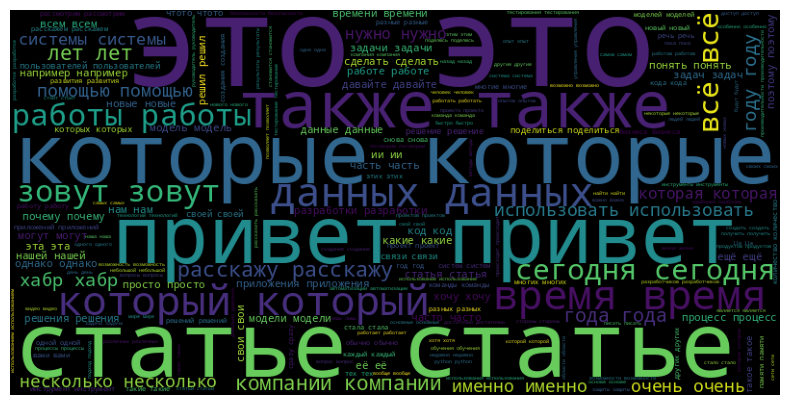

In [33]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()